In [ ]:
"""
@author : Gladis Valenzuela
"""

In [ ]:
!pip install git+https://github.com/miykael/gif_your_nifti 

# Environnement

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import gif_your_nifti.core as gif2nif
from google.colab import drive
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

ModuleNotFoundError: No module named 'google'

In [3]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/Kidneyppyng/"
os.chdir(path)

# Visualisation

## Images

In [10]:
#define the image path and load the data
image_path = "DATA/kits21/kits21/data/case_00002/imaging.nii.gz"
image_obj = nib.load(image_path)

#extract data as numpy ndarray
image_data = image_obj.get_fdata()

📌 [Understanding coordinate systems and DICOM for deep learning medical image analysis](https://theaisummer.com/medical-image-coordinates/)

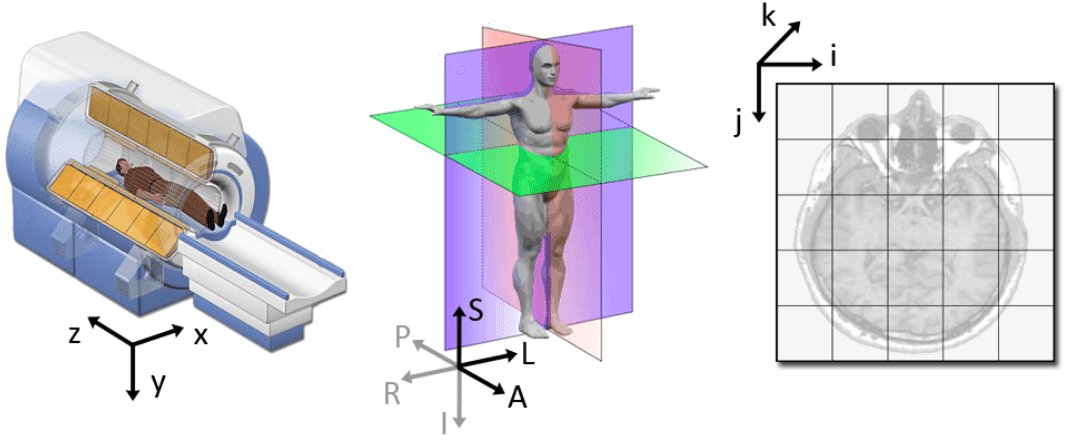

In [18]:
#shape format : (z, y, x) corresponding to (axial, coronal, sagittal) plane
image_data.shape

(261, 512, 512)

In [19]:
#define a function to visualize the raw data

def explore_3dimage(layer):
    plt.figure(figsize=(16, 9))
    plt.imshow(image_data[layer, : , :], cmap='gray');
    plt.title('Raw Data', fontsize=20, pad=30)
    plt.axis('off')
    plt.colorbar()
    return layer

#run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, image_data.shape[0] - 1));

interactive(children=(IntSlider(value=130, description='layer', max=260), Output()), _dom_classes=('widget-int…

## Segmentations

In [20]:
#same for the segmentation
label_path = "DATA/kits21/kits21/data/case_00002/aggregated_MAJ_seg.nii.gz"
label_obj = nib.load(label_path)

#extract data labels
label_array = label_obj.get_fdata()

label_array.shape

(261, 512, 512)

In [22]:
def explore_3dlabel(layer):
    """
    Function to visualize the segmentation

    Parameters : 
      layer : corresponding to z dimension, number of the sslice who wants visualize 

    Return : 
      layer : same as previous
    """
    plt.figure(figsize=(16, 9))
    data = label_array[layer, :, :]

    #get discrete colormap
    cmap = plt.get_cmap('gray', np.max(data)-np.min(data)+1)
    # set limits .5 outside true range
    im = plt.imshow(data, cmap=cmap, vmin = np.min(data)-.5, vmax = np.max(data)+.5);
    #tell the colorbar to tick at integers
    cax = plt.colorbar(im, ticks=np.arange(np.min(data), np.max(data)+1))
    
    plt.title('Ground Truth', fontsize=20, pad=30)
    plt.axis('off')
    return layer

In [27]:
#run the ipywidgets interact() function to explore the data
interact(explore_3dlabel, layer=(0, label_array.shape[0] - 1));

interactive(children=(IntSlider(value=130, description='layer', max=260), Output()), _dom_classes=('widget-int…

In [29]:
#extract the shape of the labels data
depth, height, width = label_array.shape

print(f"Dimensions of labels data array height : depth: {depth}, height: {height}, width: {width}")
print(f'With the unique values: {np.unique(label_array)}')
print("""
Corresponding to the following label categories : 
0 : background 
1 : kidney
2 : tumor 
3 : cyst 
""")

Dimensions of labels data array height : depth: 261, height: 512, width: 512
With the unique values: [0. 1. 2. 3.]

Corresponding to the following label categories : 
0 : background 
1 : kidney
2 : tumor 
3 : cyst 



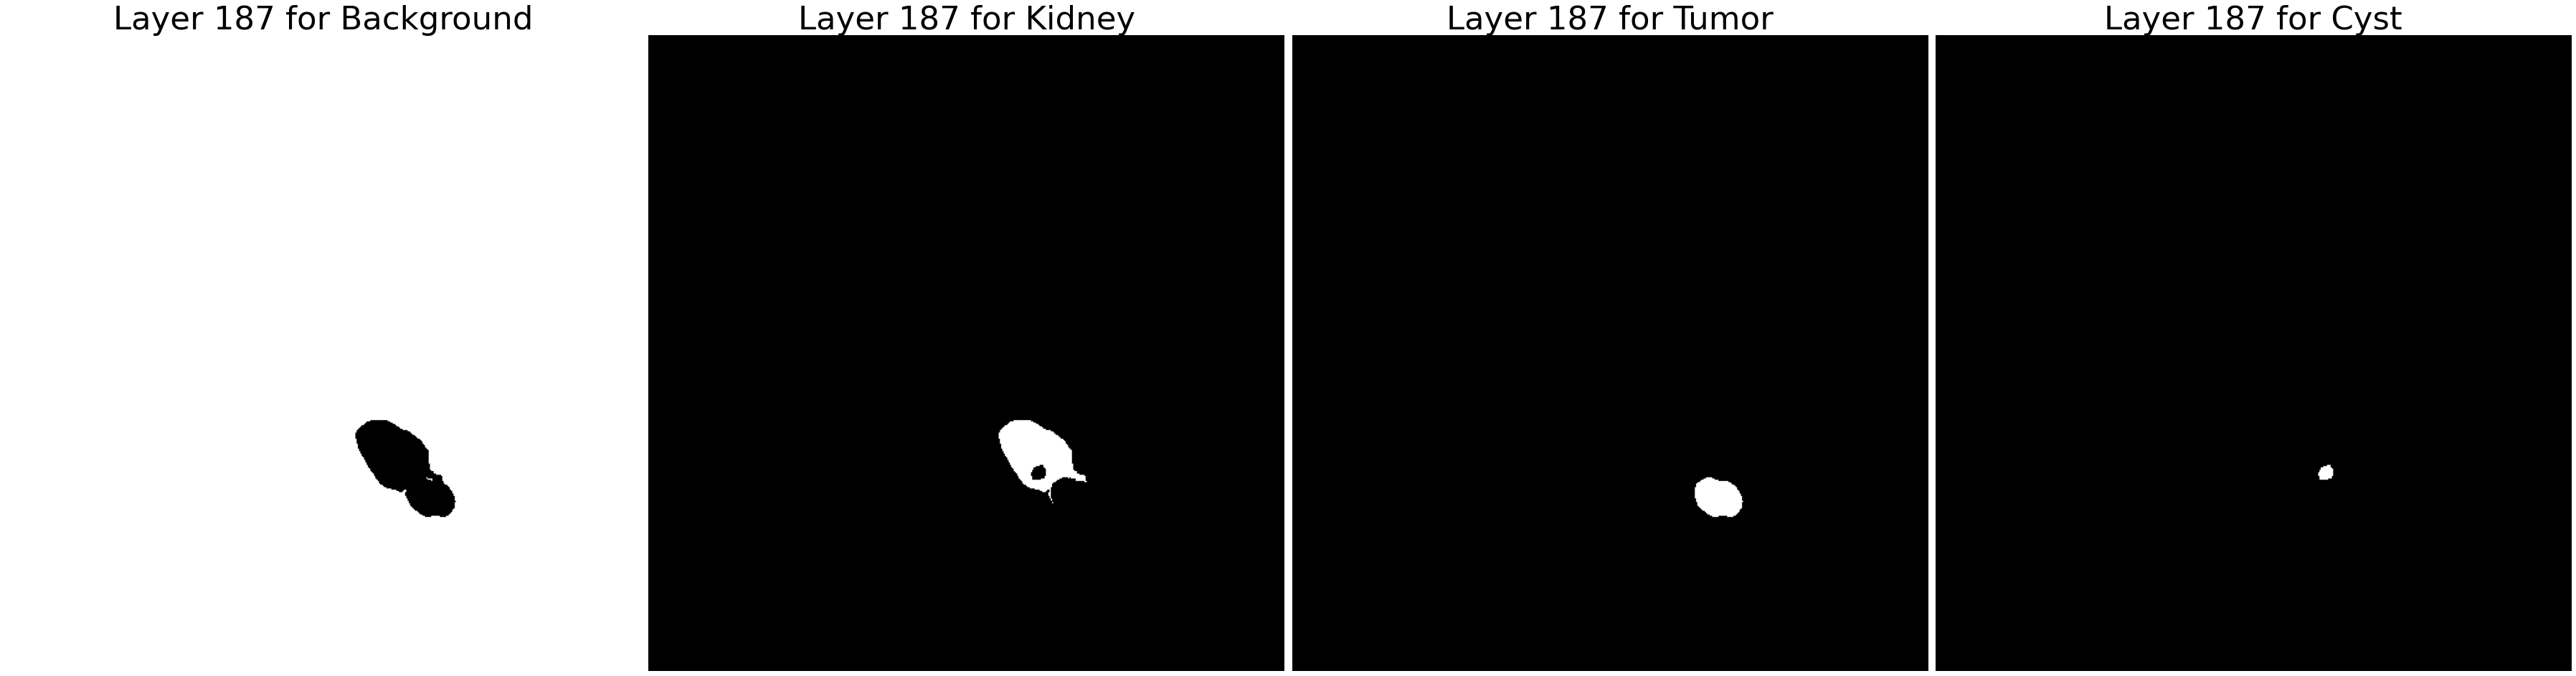

In [30]:
#define a single layer for plotting
layer = 187

#define a dictionary of class labels
classes_dict = {
    'Background': 0.,
    'Kidney': 1.,
    'Tumor': 2.,
    'Cyst': 3.,
}

#set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[layer,:,:]
    mask = np.where(img == classes_dict[img_label_str], 512, 0)
    ax[i].imshow(mask, cmap='gray')
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

In [31]:
#create button values
select_class = ToggleButtons(
    options=['Background','Kidney', 'Tumor', 'Cyst'],
    description='Select Class:',
    disabled=False,
    button_style='info', 
    )

#create layer slider
select_layer = IntSlider(min=0, max=depth, description='Select Layer', continuous_update=False)

    
#define a function for plotting images
def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    img_label = classes_dict[seg_class]
    mask = np.where(label_array[layer,:,:] == img_label, 512, 0)
    plt.figure(figsize=(10,5))
    plt.imshow(mask, cmap='gray')
    plt.axis('off');

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('Background', '…

In [32]:
#use the interactive() tool to create the visualization
interactive(plot_image, seg_class=select_class, layer=select_layer)

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('Background', '…